# Bee Primary Olfactory Center Model


## Circuit


## Cells

**There are three different types of neurons in this model:**

* ORN : olfactory receptor neurons
    * odor  - different stimulus
    * sens  - a sensibility index for each stimulus
    * group - each 4 ORN 'projects' to a PN cell, named with the group name (PN 1, PN 2,..)
    
* LN  : lateral neurons
* PN  : projection neurons

**The computational neuron used is the Leaky Integrate and Fire model, described by the following equation**

$$ \tau_m \frac{dV}{dt} = - V + V_{rest} + I    $$

# Code

### Current Version

* W matrices

### importing libraries

In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width:75% !important;}</style>')) #make jupyter cells wider

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd                               # dataframes 
import time                                       # execution time
from IPython.display import Image, display_html   # interactive plot
from sklearn.preprocessing import StandardScaler  # to PCA
from sklearn.decomposition import PCA             # to PCA
from mpl_toolkits import mplot3d                  # 3D p ot

## Defining stuff

### Creating the Neuron Class

In [2]:
class neuron():
    
    def __init__(self, tipo, index = None, group = None, odor = None, sens = None, color = None):
        self.type = tipo
        self.odor = odor
        self.sens = sens
        self.color = color     #for printing reasons
        self.index = index
        self.group = group
        
        
        
    
        if tipo == 'ORN':
            self.tau_m = 10        # ms
            self.V_rest = -65      # mV
            self.V_tresh= -55      # mV
            self.V = self.V_rest   # mV
            self.I = 0             # which unity?
            self.spikes = []       # spiking times
            self.reftime = 3       # refractory period
            
            
        if tipo == "PN": 
            self.tau_m = 10        # ms
            self.I = 0             # which unity?
            self.PSP = 0           # number of spikes received in a given time (will generate PSPs)
            self.V_rest = -65      # mV
            self.V = self.V_rest   # mV
            self.V_tresh = -55     # mV
            self.spikes=[]         # spiking times 
            self.reftime = 3       # refractory period
            self.inputs = []       #
            self.outputs = []      # 
            
        if tipo == "LN":
            self.tau_m = 10
            self.I = 0
            self.PSP = 0
            self.V_rest = -65
            self.V = self.V_rest
            self.V_tresh = -55
            self.spikes = []
            self.reftime = 3       # refractory period
            self.inputs = []       # ORN neurons --> later will be in a matrix ORN * LN
            self.outputs = []      # PN neurons --> later will be in a matrix LN * PN
            

 
    

    ## eulers method of integration        
    def integration(self, dt = 0.01, I = 0, I_thresh = 10, rmax = 50):
        
        self.V = self.V + dt/self.tau_m * (- self.V + self.V_rest + I)
        
        
 
    ## sensorial input given by (arbitrary function) : sensibility * amplitude + noise
    def inf_sensorial(self, odor = None, t_initial = 0, t_final = 0, amplitude = 0):
        
        if t*dt > t_initial and t*dt < t_final:
            if odor in self.odor: 
                self.I = self.sens[odors[odor]] * amplitude + 250*np.random.randn()  
                
        else:
            self.I  = 0
            


### Creating a Multimeter Class

Basically are objects to store the V,I and an internal time t for each neuron. It's important that each neuron has it's own time because every time one spike happen, the multimeter stores (V = 30 mV, T = t) and (V = V_rest, T = t). 

In [3]:
class multimeter():
    
    def __init__(self, cell):
        self.who = cell.index
        self.type = cell.type
        self.V = []
        self.I =[]
        self.t= []
    
    
    def measure(self,cell, t, dt,n= None):
        if cell.type == 'ORN':
            if n == cell.index:
                self.V.append(cell.V)
                self.I.append(cell.I*0.25)
                self.t.append(t*dt)   
                
        elif cell.type == 'PN':
            self.V.append(cell.V)
            self.I.append(cell.I*0.25)
            self.t.append(t*dt)  
            
        elif cell.type == 'LN':
            self.V.append(cell.V)
            self.I.append(cell.I*0.25)
            self.t.append(t*dt)  
                

### Refractory Period Condition

In [4]:
def refractory_period(cell, t):
    if  len(cell.spikes)==0:
        LAST_FIRE = 0
    else:
        LAST_FIRE = cell.spikes[-1]
        
    if t - LAST_FIRE > cell.reftime:
        return True
    
    else:
        return False
    

### Plasticity

Here, the W matrix will be call

### intializing some variables

In [5]:
def cleaning_and_initializing_lists():
    
    #RASTERPLOT
    t_orn_spike, who_orn =[], []
    t_pn_spike, who_pn = [], []
    t_ln_spikes, who_ln = [],[]
    t_lnl_spikes, who_lnl = [],[]
  
    color = []
        
    return t_orn_spike, who_orn, t_pn_spike, who_pn, t_ln_spikes, who_ln, t_lnl_spikes, who_lnl,color


##def a dictionary to access neurons properties with the letters A,B,C and D
A,B,C,D = 0,1,2,3
odors = {'A': A, 'B': B, 'C': C, 'D':D}

## Creating Stuff

### Creating 10 groups of 4 ORN

In [6]:
ORN =[]

#ORN groups 1 and 2 respond only to A odor
for i in range(4):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 0, odor = ['A'], sens = [1,0,0,0], color = 'r'))
for i in range(4,8):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 1, odor = ['A'], sens = [1,0,0,0], color = 'g'))
    

#ORN groups 3 and 4 respond to A and B odor
for i in range(8, 12):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 2, odor = ['A', 'B'], sens = [1,1,0,0], color = 'b'))
for i in range(12,16):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 3, odor = ['A', 'B'], sens = [1,1,0,0], color = 'c'))
    
    
#ORN groups 5 and 6 respond to B and C odor
for i in range(16, 20):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 4, odor = ['B', 'C'], sens = [0,1,1,0], color = 'm'))
for i in range(20,24):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 5, odor = ['B', 'C'], sens = [0,1,1,0], color = 'y'))
    
    
#ORN group 7 respond only to C odor
for i in range(24, 28):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 6, odor = ['C'], sens = [0,1,0,0], color = 'k'))
    
#ORN groups 8,9 and 10 respond to C and D odor
for i in range(28, 32):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 7, odor = ['C', 'D'], sens = [0,0,1,1], color = 'purple'))
for i in range(32,36):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 8, odor = ['C', 'D'], sens = [0,0,1,1], color = 'deeppink'))
for i in range(36,40):
    ORN.append(neuron(tipo = 'ORN', index = i, group = 9, odor = ['C', 'D'], sens = [0,0,1,1], color = 'yellowgreen'))
    
    
    
    
## ----- ORN Dataframe    
df_tipo, df_odor, df_sens, df_index, df_group, df_color, = [],[],[],[],[],[]    
df_tipo.clear()   
df_odor.clear()
df_sens.clear()
df_index.clear()
df_group.clear()
df_color.clear()
    
    
for i in range(40):
    df_tipo.append(ORN[i].type)
    df_odor.append(ORN[i].odor)
    df_sens.append(ORN[i].sens)
    df_index.append(ORN[i].index)
    df_group.append(ORN[i].group)
    df_color.append(ORN[i].color)
    
    DATA = {'index': df_index,'grupo': df_group,'tipo de neurônio': df_tipo, 'receptor olfativo': df_odor, 'sensibilidade': df_sens, 'plot color': df_color}    
    
dataframe_ORN = pd.DataFrame(DATA)    



### Creating 10 PN

In [7]:
PN = []
PN.clear()

df_tipo, df_index = [],[]  
  
for i in range(10):    
    PN.append(neuron(tipo = "PN", index = i))
    df_tipo.append(PN[i].type)
    df_index.append(PN[i].index)
    
##PN dataframe
DATA = {'index': df_index,'tipo de neurônio': df_tipo}
dataframe_PN = pd.DataFrame(DATA)     

### Creating 10 Global LN

Creating the connections between ORNs and PNs, storing on a internal variable for each LN and then creating a global matrix to later try matricial operations.

In [8]:
LNG = []

for i in range(10):
    LNG.append(neuron(tipo = 'LN', index = i))

#LN dataframes
df_tipo, df_index = [],[]  
  
for i in range(10):    
    df_tipo.append(LNG[i].type)
    df_index.append(LNG[i].index)
    
##PN dataframe
DATA = {'index': df_index,'tipo de neurônio': df_tipo}
dataframe_LNG = pd.DataFrame(DATA)     
        


### Creating 100 Lateral LN

In [9]:
LNL = []

for i in range(100):
    LNL.append(neuron(tipo = 'LN', index = i))

        


#LN dataframes
df_tipo, df_index = [],[]  
  
for i in range(100):    
    df_tipo.append(LNL[i].type)
    df_index.append(LNL[i].index)
    
##PN dataframe
DATA = {'index': df_index,'tipo de neurônio': df_tipo}
dataframe_LNL = pd.DataFrame(DATA)     
        


### Connecting

In [10]:
# ORN --> LNL
for i in range(len(LNL)):
    for j in range(len(ORN)):
        if int(j/4)== int(i/10):
            LNL[i].inputs.append(np.random.uniform())
        else:
            LNL[i].inputs.append(0) 
    
    
    
ORN_LNL = np.zeros(shape = [len(ORN), len(LNL)]) #matrix input of LN from ORN

for i in range(len(LNL)):
    for j in range(len(ORN)):
        ORN_LNL[j,i]=LNL[i].inputs[j]
        
        
        
# ORN --> LNG  |-----------------------------------------------------------------------\
for i in range(len(LNG)):
    for j in range(len(ORN)):
        LNG[i].inputs.append(np.random.binomial(n=1,p=0.3) * np.random.uniform()) 
    
    
    
ORN_LNG = np.zeros(shape = [len(ORN), len(LNG)]) #matrix input of LN from ORN

for i in range(len(LNG)):
    for j in range(len(ORN)):
        ORN_LNG[j,i]=LNG[i].inputs[j]
        
        
        
# ORN --> PN |-----------------------------------------------------------------------\
for i in range(len(PN)):
    for j in range(len(ORN)):
        if int(j/4) == i:
            PN[i].inputs.append(np.random.uniform()) 
        else:
            PN[i].inputs.append(0)
            
    
    
    
ORN_PN = np.zeros(shape = [len(ORN), len(PN)]) #matrix input of LN from ORN

for i in range(len(PN)):
    for j in range(len(ORN)):
        ORN_PN[j,i]=PN[i].inputs[j]
         

         


In [11]:
# LNL --> PN
for i in range(len(PN)):
    PN[i].inputs.clear()
    for j in range(len(LNL)):
        if int(j/10)== int(i):
            PN[i].inputs.append(0) 
        else:
            PN[i].inputs.append(np.random.binomial(n=1, p=0.2)*np.random.uniform())
    
    
    
    
LNL_PN = np.zeros(shape = [len(LNL), len(PN)]) #matrix input of LN from ORN

for i in range(len(PN)):
    for j in range(len(LNL)):
        LNL_PN[j,i]=PN[i].inputs[j]
        
        
        
# LNL --> LNG  |-----------------------------------------------------------------------\
for i in range(len(LNG)):
    LNG[i].inputs.clear()
    for j in range(len(LNL)):
        LNG[i].inputs.append(np.random.binomial(n=1,p=0.3) * np.random.uniform()) 
    
    
    
LNL_LNG = np.zeros(shape = [len(LNL), len(LNG)]) #matrix input of LN from ORN

for i in range(len(LNG)):
    for j in range(len(LNL)):
        LNL_LNG[j,i]=LNG[i].inputs[j]
        


In [12]:
# LNG --> PN
for i in range(len(PN)):
    PN[i].inputs.clear()
    for j in range(len(LNG)):
        if int(j)== int(i):
            PN[i].inputs.append(0) 
        else:
            PN[i].inputs.append(np.random.binomial(n=1, p=1) + 0.1* np.random.uniform())
    
    
    
    
LNG_PN = np.zeros(shape = [len(LNG), len(PN)]) #matrix input of LN from ORN

for i in range(len(PN)):
    for j in range(len(LNG)):
        LNG_PN[j,i]=PN[i].inputs[j]
        
        
        
# LNG --> LNL  |-----------------------------------------------------------------------\
for i in range(len(LNL)):
    LNL[i].inputs.clear()
    for j in range(len(LNG)):
        LNL[i].inputs.append(np.random.binomial(n=1,p=1)+ 0.1 * np.random.uniform()) 
    
    
    
LNG_LNL = np.zeros(shape = [len(LNG), len(LNL)]) #matrix input of LN from ORN

for i in range(len(LNL)):
    for j in range(len(LNG)):
        LNG_LNL[j,i]=LNL[i].inputs[j]
        

### Ploting LN's weight matrices

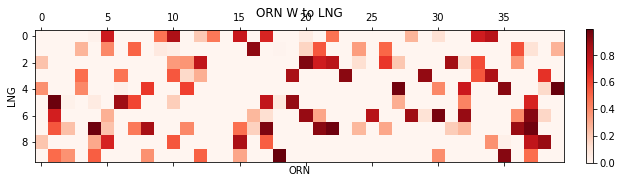

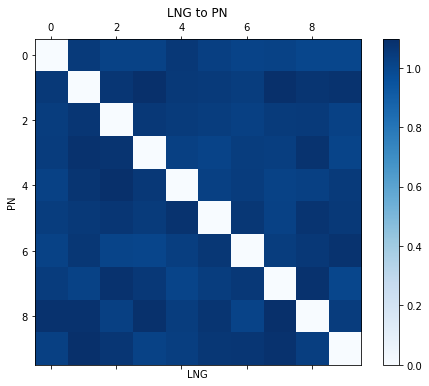

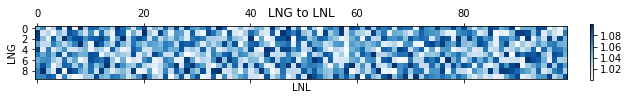

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

f=axes.matshow(ORN_LNL, cmap='Reds')
axes.set_title("ORNs W to LNL")
axes.set(ylabel='ORNs')
axes.set(xlabel='LNs Globais')
plt.colorbar(f, ax= axes,fraction=0.019, pad=0.04)

fig2, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

ff = axes2.matshow(ORN_LNG.T, cmap='Reds')
axes2.set_title("ORN W to LNG")
axes2.set(xlabel='ORN')
axes2.set(ylabel='LNG')
plt.colorbar(ff, ax = axes2,fraction=0.012, pad=0.04)

fig3, axes3 = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fff = axes3.matshow(ORN_PN.T, cmap='Reds')
axes3.set_title("ORN to PN")
axes3.set(xlabel='ORN')
axes3.set(ylabel='PN')
plt.colorbar(fff, ax = axes3,fraction=0.012, pad=0.04)


fig4, axes4 = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ffff = axes4.matshow(LNL_PN.T, cmap='Blues')
axes4.set_title("LNL to PN")
axes4.set(xlabel='LNL')
axes4.set(ylabel='PN')
plt.colorbar(ffff, ax = axes4,fraction=0.005, pad=0.04)

fig5, axes5 = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fffff = axes5.matshow(LNL_LNG.T, cmap='Blues')
axes5.set_title("LNL to LNG")
axes5.set(xlabel='LNL')
axes5.set(ylabel='LNG')
plt.colorbar(fffff, ax = axes5,fraction=0.005, pad=0.04)

fig6, axes6 = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
ffffff = axes6.matshow(LNG_PN.T, cmap='Blues')
axes6.set_title("LNG to PN")
axes6.set(xlabel='LNG')
axes6.set(ylabel='PN')
plt.colorbar(ffffff, ax = axes6,fraction=0.1, pad=0.04)

fig7, axes7 = plt.subplots(nrows=1, ncols=1, figsize=(10,6))
fffffff = axes7.matshow(LNG_LNL, cmap='Blues')
axes7.set_title("LNG to LNL")
axes7.set(xlabel='LNL')
axes7.set(ylabel='LNG')
plt.colorbar(fffffff, ax = axes7,fraction=0.005, pad=0.04)







### Displaying Neurons Dataframes

In [14]:
#TO DISPLAY NEURONS DATAFRAMES
df1_styler = dataframe_ORN.style.set_table_attributes("style='display:inline'").set_caption('Neurônios ORN')
df2_styler = dataframe_PN.style.set_table_attributes("style='display:inline'").set_caption('Neurônios PN')
df3_styler = dataframe_LNL.style.set_table_attributes("style='display:inline'").set_caption('Neurônios LN Globais')
df4_styler = dataframe_LNG.style.set_table_attributes("style='display:inline'").set_caption('Neurônios LN Laterais')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

Neurônios ORN 
 
 
 index 
 grupo 
 tipo de neurônio 
 receptor olfativo 
 sensibilidade 
 plot color 
 
 
 0 
 0 
 0 
 ORN 
 ['A'] 
 [1, 0, 0, 0] 
 r 
 
 1 
 1 
 0 
 ORN 
 ['A'] 
 [1, 0, 0, 0] 
 r 
 
 2 
 2 
 0 
 ORN 
 ['A'] 
 [1, 0, 0, 0] 
 r 
 
 3 
 3 
 0 
 ORN 
 ['A'] 
 [1, 0, 0, 0] 
 r 
 
 4 
 4 
 1 
 ORN 
 ['A'] 
 [1, 0, 0, 0] 
 g 
 
 5 
 5 
 1 
 ORN 
 ['A'] 
 [1, 0, 0, 0] 
 g 
 
 6 
 6 
 1 
 ORN 
 ['A'] 
 [1, 0, 0, 0] 
 g 
 
 7 
 7 
 1 
 ORN 
 ['A'] 
 [1, 0, 0, 0] 
 g 
 
 8 
 8 
 2 
 ORN 
 ['A', 'B'] 
 [1, 1, 0, 0] 
 b 
 
 9 
 9 
 2 
 ORN 
 ['A', 'B'] 
 [1, 1, 0, 0] 
 b 
 
 10 
 10 
 2 
 ORN 
 ['A', 'B'] 
 [1, 1, 0, 0] 
 b 
 
 11 
 11 
 2 
 ORN 
 ['A', 'B'] 
 [1, 1, 0, 0] 
 b 
 
 12 
 12 
 3 
 ORN 
 ['A', 'B'] 
 [1, 1, 0, 0] 
 c 
 
 13 
 13 
 3 
 ORN 
 ['A', 'B'] 
 [1, 1, 0, 0] 
 c 
 
 14 
 14 
 3 
 ORN 
 ['A', 'B'] 
 [1, 1, 0, 0] 
 c 
 
 15 
 15 
 3 
 ORN 
 ['A', 'B'] 
 [1, 1, 0, 0] 
 c 
 
 16 
 16 
 4 
 ORN 
 ['B', 'C'] 
 [0, 1, 1, 0] 
 m 
 
 17 
 17 
 4 
 ORN 
 ['B', 'C'] 
 [0, 1, 1, 0] 
 m 
 
 18 
 18 
 4 
 ORN 
 ['B', 'C'] 
 [0, 1, 1, 0] 
 m 
 
 19 
 19 
 4 
 ORN 
 ['B', 'C'] 
 [0, 1, 1, 0] 
 m 
 
 20 
 20 
 5 
 ORN 
 ['B', 'C'] 
 [0, 1, 1, 0] 
 y 
 
 21 
 21 
 5 
 ORN 
 ['B', 'C'] 
 [0, 1, 1, 0] 
 y 
 
 22 
 22 
 5 
 ORN 
 ['B', 'C'] 
 [0, 1, 1, 0] 
 y 
 
 23 
 23 
 5 
 ORN 
 ['B', 'C'] 
 [0, 1, 1, 0] 
 y 
 
 24 
 24 
 6 
 ORN 
 ['C'] 
 [0, 1, 0, 0] 
 k 
 
 25 
 25 
 6 
 ORN 
 ['C'] 
 [0, 1, 0, 0] 
 k 
 
 26 
 26 
 6 
 ORN 
 ['C'] 
 [0, 1, 0, 0] 
 k 
 
 27 
 27 
 6 
 ORN 
 ['C'] 
 [0, 1, 0, 0] 
 k 
 
 28 
 28 
 7 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 purple 
 
 29 
 29 
 7 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 purple 
 
 30 
 30 
 7 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 purple 
 
 31 
 31 
 7 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 purple 
 
 32 
 32 
 8 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 deeppink 
 
 33 
 33 
 8 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 deeppink 
 
 34 
 34 
 8 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 deeppink 
 
 35 
 35 
 8 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 deeppink 
 
 36 
 36 
 9 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 yellowgreen 
 
 37 
 37 
 9 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 yellowgreen 
 
 38 
 38 
 9 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 yellowgreen 
 
 39 
 39 
 9 
 ORN 
 ['C', 'D'] 
 [0, 0, 1, 1] 
 yellowgreen 
 
 
 Neurônios PN 
 
 
 index 
 tipo de neurônio 
 
 
 0 
 0 
 PN 
 
 1 
 1 
 PN 
 
 2 
 2 
 PN 
 
 3 
 3 
 PN 
 
 4 
 4 
 PN 
 
 5 
 5 
 PN 
 
 6 
 6 
 PN 
 
 7 
 7 
 PN 
 
 8 
 8 
 PN 
 
 9 
 9 
 PN 
 
 
 Neurônios LN Globais 
 
 
 index 
 tipo de neurônio 
 
 
 0 
 0 
 LN 
 
 1 
 1 
 LN 
 
 2 
 2 
 LN 
 
 3 
 3 
 LN 
 
 4 
 4 
 LN 
 
 5 
 5 
 LN 
 
 6 
 6 
 LN 
 
 7 
 7 
 LN 
 
 8 
 8 
 LN 
 
 9 
 9 
 LN 
 
 10 
 10 
 LN 
 
 11 
 11 
 LN 
 
 12 
 12 
 LN 
 
 13 
 13 
 LN 
 
 14 
 14 
 LN 
 
 15 
 15 
 LN 
 
 16 
 16 
 LN 
 
 17 
 17 
 LN 
 
 18 
 18 
 LN 
 
 19 
 19 
 LN 
 
 20 
 20 
 LN 
 
 21 
 21 
 LN 
 
 22 
 22 
 LN 
 
 23 
 23 
 LN 
 
 24 
 24 
 LN 
 
 25 
 25 
 LN 
 
 26 
 26 
 LN 
 
 27 
 27 
 LN 
 
 28 
 28 
 LN 
 
 29 
 29 
 LN 
 
 30 
 30 
 LN 
 
 31 
 31 
 LN 
 
 32 
 32 
 LN 
 
 33 
 33 
 LN 
 
 34 
 34 
 LN 
 
 35 
 35 
 LN 
 
 36 
 36 
 LN 
 
 37 
 37 
 LN 
 
 38 
 38 
 LN 
 
 39 
 39 
 LN 
 
 40 
 40 
 LN 
 
 41 
 41 
 LN 
 
 42 
 42 
 LN 
 
 43 
 43 
 LN 
 
 44 
 44 
 LN 
 
 45 
 45 
 LN 
 
 46 
 46 
 LN 
 
 47 
 47 
 LN 
 
 48 
 48 
 LN 
 
 49 
 49 
 LN 
 
 50 
 50 
 LN 
 
 51 
 51 
 LN 
 
 52 
 52 
 LN 
 
 53 
 53 
 LN 
 
 54 
 54 
 LN 
 
 55 
 55 
 LN 
 
 56 
 56 
 LN 
 
 57 
 57 
 LN 
 
 58 
 58 
 LN 
 
 59 
 59 
 LN 
 
 60 
 60 
 LN 
 
 61 
 61 
 LN 
 
 62 
 62 
 LN 
 
 63 
 63 
 LN 
 
 64 
 64 
 LN 
 
 65 
 65 
 LN 
 
 66 
 66 
 LN 
 
 67 
 67 
 LN 
 
 68 
 68 
 LN 
 
 69 
 69 
 LN 
 
 70 
 70 
 LN 
 
 71 
 71 
 LN 
 
 72 
 72 
 LN 
 
 73 
 73 
 LN 
 
 74 
 74 
 LN 
 
 75 
 75 
 LN 
 
 76 
 76 
 LN 
 
 77 
 77 
 LN 
 
 78 
 78 
 LN 
 
 79 
 79 
 LN 
 
 80 
 80 
 LN 
 
 81 
 81 
 LN 
 
 82 
 82 
 LN 
 
 83 
 83 
 LN 
 
 84 
 84 
 LN 
 
 85 
 85 
 LN 
 
 86 
 86 
 LN 
 
 87 

### Creating Multimeter for Some Neurons

There is two exemples commented of how to create multimeters for ORN and PN.

In [15]:
#remember that the nerons are from 0 to 39

###for TWO ORN cells
n_15 = multimeter(cell = ORN[15])
n_1 = multimeter(cell = ORN[1])

###multimetro for every PN
m_pn = []
m_pn.clear()
for i in range(10):
    m_pn.append(multimeter(cell = PN[i]))
    
    
m_ln_1 = multimeter(cell = LNL[1])


## Computation

In [ ]:
#creating some empty lists
t_orn_spike, who_orn, t_pn_spike, who_pn, t_ln_spike, who_ln, t_lnl_spike, who_lnl, color = cleaning_and_initializing_lists()

dt = 0.01
tmax = 650000 # t*dt = ms


##loop over the time of simulation
for t in range(tmax):
    n_15.measure(ORN[15],t,dt,n=15)      # calling multimeter outside ORN's loop     
    n_1.measure(ORN[1], t, dt,n=1)       # calling multimeter outside ORN's loop
    m_ln_1.measure(LNL[1], t, dt,n=1)
    
    
    ##loop over all ORN cells
    for n in range(40):
           
        ## when we try to use the ORN.inf_sensorial function more than one time for the same 'odor',
        ## what happens it that only the higher limits of t_initial and t_final are "saved" and 
        ## only the last call works, so to make it happens it is possible to put the later calls
        ## inside a IF condition by the t_initial time of apply stimuli
        
        ###giving some stimuli (the IF conditional is important:read above)----   
        ORN[n].inf_sensorial(odor = 'A', t_initial = 500, t_final = 1500, amplitude = 15) # pure A
        if (t*dt > 1900) :ORN[n].inf_sensorial(odor = 'B', t_initial = 2000, t_final = 3000, amplitude = 15) # pure A
        if (t*dt > 3400) :ORN[n].inf_sensorial(odor = 'A', t_initial = 3500, t_final = 4500, amplitude = 10) # pure A
        if (t*dt > 3400) :ORN[n].inf_sensorial(odor = 'B', t_initial = 3500, t_final = 4500, amplitude = 15) # pure A
        if (t*dt > 4900) :ORN[n].inf_sensorial(odor = 'A', t_initial = 5000, t_final = 6000, amplitude = 15) # pure A    
        if (t*dt > 4900) :ORN[n].inf_sensorial(odor = 'B', t_initial = 5000, t_final = 6000, amplitude = 10) # pure B
        ##--------------------------------------------------------    
    
        ORN[n].integration(dt, ORN[n].I)
        
      
        if (ORN[n].V > ORN[n].V_tresh) and (refractory_period(ORN[n],t*dt) == True):
            t_orn_spike.append(t*dt)
            who_orn.append(n)
            color.append(ORN[n].color)
            ORN[n].V=(40)
            
            n_15.measure(ORN[15],t,dt, n=15 )   # calling multimeter when a given ORN fires  
            n_1.measure(ORN[1], t, dt, n=1)     # calling multimeter when a given ORN fires  
            ORN[n].V = ORN[n].V_rest - 5   
           
            ORN[n].spikes.append(t*dt)

         
        
            #spikes from ORN to LNL
            for j in range(len(LNL)):
                LNL[j].PSP += 5*ORN_LNL[n][j]
                
            #spikes from ORN to LNG
            for j in range(len(LNG)):
                LNG[j].PSP += 5*ORN_LNG[n][j]
            
             #spikes from ORN to PN
            for j in range(len(PN)):
                PN[j].PSP += 2*ORN_PN[n][j]               
   
        
    #LN_G integration
    for i in range(10):
        LNG[i].I += 1.0*LNG[i].PSP
        LNG[i].integration(dt,I = LNG[i].I)
        LNG[i].I = LNG[i].I - dt/10 * LNG[i].I
        
        
        if (LNG[i].V > LNG[i].V_tresh) and (refractory_period(LNG[i],t*dt) == True):
         
            LNG[i].spikes.append(t*dt)
           
            t_ln_spike.append(t*dt)
            who_ln.append(i + 50)
            LNG[i].V=(40)
            m_ln_1.measure(LNG[1], t, dt,n=1)
            LNG[i].V = LNG[i].V_rest - 5   
            
            
            for k in range(10):
                PN[k].PSP -= 0.01*LNG_PN[i][k]
                
                
    #LN_L integration            
    for i in range(len(LNL)):
        LNL[i].I += 1* LNL[i].PSP
        LNL[i].integration(dt,I = LNL[i].I)
        LNL[i].I = LNL[i].I - dt/10 * LNL[i].I
        
        
        if (LNL[i].V > LNL[i].V_tresh) and (refractory_period(LNL[i],t*dt) == True):
         
            LNL[i].spikes.append(t*dt)
           
            t_lnl_spike.append(t*dt)
            who_lnl.append(i + 60)
            LNL[i].V=(40)
            #m_ln_1.measure(LN[1], t, dt,n=1)
            LNL[i].V = LNL[i].V_rest - 5   
            
            
            for k in range(10):
                PN[k].PSP -= 0.3*LNL_PN[i][k]
                
        LNL[i].PSP = 0
    
    
    
    for i in range(10):
        PN[i].I += 5*PN[i].PSP
        PN[i].integration(dt,I = PN[i].I)
        
        
        if (PN[i].V > PN[i].V_tresh) and (refractory_period(PN[i],t*dt) == True):
            t_pn_spike.append(t*dt)
            who_pn.append(i + 40)
            PN[i].V=(40)
            PN[i].V = ORN[n].V_rest - 5
            m_pn[i].measure(PN[i], t, dt,n=i)
            
           
            PN[i].spikes.append(t*dt)
        
        
        m_pn[i].measure(PN[i], t, dt,n=i)
        PN[i].I = PN[i].I - dt/10 * PN[i].I
        PN[i].PSP =0
        LNL[i].PSP = 0
        LNG[i].PSP=0
     
   ##---------------------------------------------------- 
           


## Analysis

### Rasterplot

In [ ]:
%matplotlib notebook

plt.figure(figsize = (10,6))
plt.title ("RASTERPLOT OF ORN NEURONS")
plt.scatter(t_orn_spike, who_orn,c = color, s =30, marker = "|")
plt.scatter(t_pn_spike, who_pn, color = 'k', s = 30, marker = '|')
plt.scatter(t_ln_spike, who_ln, color = 'r', s = 30, marker = "|")
plt.scatter(t_lnl_spike, who_lnl, color = 'yellowgreen', s = 30, marker = "|")
plt.xlabel("time (ms)")
plt.ylabel("neuron index")
plt.show()


### Histograms

In [ ]:
#creating lists for each ORN group, storing their colors for plot
hist_grupos = []
color_grupos = ['r','g','b','c','m','y','k','purple','deeppink','yellowgreen']
for i in range(10):
    hist_grupos.append([])
    
#appending the firing times of each of the 4 neurons that composes one group in one single list
ax = 0
for i in range(40):
    n = int(i/4)
    for k in ORN[i].spikes:
        hist_grupos[n].append(k)


        
#for i in range(10):
    #print(int(len(hist_grupos[n])/4))
        

        
        
##histograms for each ORN group
if True:
    fig = plt.figure(figsize = (10,6))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_ylim3d(0, 200)
    for n in range(10):
        x,y = np.histogram(hist_grupos[n], bins = 100, range = [0,9500])
        
        y = y[:-1]
        xx = y #tempo
         
        #mplot3d.axes3d.Axes3D.bar3d(ax,x=xx, y=n, z= 0, dx=20, dy=0.5, dz = x)
        mplot3d.Axes3D.plot(ax,y,x,n)
       
        
        #plt.title("Histogram of spikes")
        #plt.xlabel("time(ms)")
        #plt.ylabel("# spikes")
        #plt.ylim(0,12)
        #plt.xlim(0,3000)
        #plt.hist(hist_grupos[n], bins = 100, alpha = 0.3, color = color_grupos[n])

        #plt.legend()
        plt.show()

### ISI 

In [ ]:
ISI_ORN = []
for cell in ORN:
    for spk in range(1,len(cell.spikes)-1):
        ISI_ORN.append(cell.spikes[spk+1] - cell.spikes[spk])
        
        
ISI_LN= []
for cell in LNG:
    for spk in range(1,len(cell.spikes)-1):
        ISI_LN.append(cell.spikes[spk+1] - cell.spikes[spk])
        
        
        
ISI_LNL= []
for cell in LNL:
    for spk in range(1,len(cell.spikes)-1):
        ISI_LNL.append(cell.spikes[spk+1] - cell.spikes[spk])
        
        
        
ISI_PN= []
for cell in PN:
    for spk in range(1,len(cell.spikes)-1):
        ISI_PN.append(cell.spikes[spk+1] - cell.spikes[spk])


plt.figure(figsize = (10,5))
plt.title("ISI")
plt.hist(ISI_ORN, bins = 50, range=[0,50], color= 'b', alpha = 0.5, label ="ORN")
plt.hist(ISI_LN, bins = 50, range=[0,50], color = 'r', alpha = 0.8, label ="LN_G")
plt.hist(ISI_LNL, bins = 50, range=[0,50], color = 'g', alpha = 0.2, label ="LN_L")
plt.xlabel('time (ms)')
plt.ylabel('freq')
plt.legend()
sub_axes = plt.axes([.64, .2, .25, .25]) 
sub_axes.hist(ISI_PN, bins = 50, range=[0,50], color = 'k', alpha = 0.5, label ="PN")
plt.legend()
plt.show()
    
    
    
    

### V(t) and I(t) plots

In [ ]:
#ORNs
if True:   
    plt.figure(figsize = (12,4))
    plt.title("V(t) and I(t) of 2 ORN neurons")
    plt.xlabel("time (ms)")
    plt.ylabel("V(mV) or current in ORN")
    plt.plot(n_15.t, n_15.V, label="V_apple", c = 'r')
    plt.plot(n_15.t, n_15.I, label = "I_apple" , c = 'r', alpha = 0.5)
    plt.legend()
    plt.show()

    plt.figure(figsize = (12,4))
    plt.title("V(t) and I(t) of 2 ORN neurons")
    plt.xlabel("time (ms)")
    plt.ylabel("V(mV) or current in ORN")
    plt.plot(n_1.t, n_1.V, label="V_apple", c = 'b')
    plt.plot(n_1.t, n_1.I, label = "I_apple" , c = 'b', alpha = 0.5)
    plt.legend()
    plt.show()


In [ ]:
# LNs
#%matplotlib notebook
plt.figure(figsize = (12,4))
plt.title("V(t) and I(t) of 2 ORN neurons")
plt.xlabel("time (ms)")
plt.ylabel("V(mV) or current in ORN")
plt.plot(m_ln_1.t, m_ln_1.V, label="V_apple", c = 'b')
plt.plot(m_ln_1.t, m_ln_1.I, label="V_apple", c = 'r')
plt.legend()
plt.show()

In [ ]:
#PNs
%matplotlib notebook
plt.figure(figsize = (10,4))
plt.title("r(t) and I(t) of 2 GL neuron-like")
plt.xlabel("time(ms)")
plt.ylabel("r (spikes/s) or current in GL")

for m in range(1):
    plt.plot(m_pn[m].t,m_pn[m].V)
    plt.plot(m_pn[m].t,m_pn[m].I, alpha = 0.4)



### PCA 

In [ ]:
all[0]

In [ ]:
all = []
all.clear()
for i in range(10):
    all.append([])
    
BIN = 500
lim = int(BIN/5)
    
for i in range(10):
    P = np.histogram(PN[i].spikes,bins = BIN, range=[0,6500])
    all[i].extend(P[0])
    
    
    
    
data = {'PN1': all[0],'PN2': all[1],'PN3': all[2],'PN4': all[3],'PN5': all[4],\
       'PN6': all[5],'PN7': all[6],'PN8': all[7],'PN9': all[8],'PN10': all[9]}

ALL = pd.DataFrame(data)

features = ['PN1','PN2','PN3','PN4','PN5','PN6','PN7','PN8','PN9','PN10']# Separating out the features
x = ALL.loc[:,features].values
#x = StandardScaler().fit_transform(x)

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1',\
                                                                  'principal component 2',\
                                                                  'principal component 3'])
                           
                           

x3 = np.array(principalDf.loc[:,['principal component 1']])
y3 = np.array(principalDf.loc[:,['principal component 2']])
z3 = np.array(principalDf.loc[:,['principal component 3']])
                           
data = {}
x3 = np.ndarray.flatten(x3)
y3 = np.ndarray.flatten(y3)
z3 = np.ndarray.flatten(z3)


In [ ]:
%matplotlib notebook
fig = plt.figure(figsize= (12,6))
ax = plt.axes(projection='3d')

ax.plot3D(x3,y3,z3)
ax.scatter(x3[0], y3[0], z3[0], c = 'r', s = 30, label = "resting state")
ax.plot3D(x3[0:lim],y3[0:lim],z3[0:lim], c = 'g', label = "stim1")
ax.plot3D(x3[lim:2*lim],y3[lim:2*lim],z3[lim:2*lim], c = 'k', label = "stim2")
ax.plot3D(x3[2*lim:3*lim],y3[2*lim:3*lim],z3[2*lim:3*lim] ,c = 'purple', label = "stim3")
ax.plot3D(x3[3*lim:4*lim],y3[3*lim:4*lim], z3[3*lim:4*lim],c = 'y', label = "stim4")
#ax.plot3D(x3[4*lim:5*lim],y3[4*lim:5*lim], z3[4*lim:5*lim],c = 'yellowgreen', label = "stim5")
#ax.plot3D(x3[5*lim:6*lim],y3[5*lim:6*lim], z3[5*lim:6*lim],c = 'pink', label = "stim5")

plt.show()


In [ ]:
all = []
all.clear()
for i in range(10):
    all.append([]) 
    
BIN = 400
lim = int(BIN/4)

    
for i in range(10):
    P = np.histogram(PN[i].spikes,bins = BIN, range = [0,6500])
    all[i].extend(P[0])
    
    
    
    
data = {'PN1': all[0],'PN2': all[1],'PN3': all[2],'PN4': all[3],'PN5': all[4],\
       'PN6': all[5],'PN7': all[6],'PN8': all[7],'PN9': all[8],'PN10': all[9]}

ALL = pd.DataFrame(data)

features = ['PN1','PN2','PN3','PN4','PN5','PN6','PN7','PN8','PN9','PN10']# Separating out the features
x = ALL.loc[:,features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
                           
                           

x3 = np.array(principalDf.loc[:,['principal component 1']])
y3 = np.array(principalDf.loc[:,['principal component 2']])
#z3 = np.array(principalDf.loc[:,['principal component 3']])
                           
data = {}
x3 = np.ndarray.flatten(x3)
y3 = np.ndarray.flatten(y3)
#z3 = np.ndarray.flatten(z3)


In [ ]:
%matplotlib notebook
#plt.figure(figsize = (7,7))
#plt.plot(x1,y1)
#plt.plot(x2,y2)
#plt.plot(x3,y3)



plt.plot(x3,y3,label = "all dynamics")
plt.scatter(x3[0],y3[0], c = 'r', label = "resting state")
plt.plot(x3[0:lim],y3[0:lim], c = 'g', label = "stim1")
plt.plot(x3[lim:2*lim],y3[lim:2*lim], c = 'k', label = "stim2")
plt.plot(x3[2*lim:3*lim],y3[2*lim:3*lim], c = 'purple', label = "stim3")
plt.plot(x3[3*lim:4*lim],y3[3*lim:4*lim], c = 'y', label = "stim4")
#plt.plot(x3[4*lim:5*lim],y3[4*lim:5*lim],c = 'yellowgreen', label = "stim5")
#plt.plot(x3[5*lim:6*lim],y3[5*lim:6*lim],c = 'pink', label = "stim6")
plt.legend()
plt.show()